<a href="https://colab.research.google.com/github/bismark-joe/ML-project_experience/blob/master/SVM_Classifier_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
BASE_DIR = "/content/drive/MyDrive/***"
os.chdir(BASE_DIR)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import tensorflow as tf

# # Check if a GPU is available
# if tf.config.list_physical_devices('GPU'):
#     print("GPU is available")
# else:
#     print("GPU is not available")


In [ ]:
pip install scikit-learn joblib


In [ ]:
import pandas as pd

# Load the original CSV file into a DataFrame
df = pd.read_csv('cleaned_dataset_without_missing_text.csv')

# Drop columns you don't need
columns_to_keep = ['Content', 'Hate', 'Non-Hate']
df = df[columns_to_keep]

# Save the modified DataFrame as a new CSV file
df.to_csv('svm_stage1_dataset.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load your dataset
data = pd.read_csv('svm_stage1_dataset.csv')

# Extract the text data
X = data['Content']

# Create TF-IDF vectorizer without limiting features initially
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data to get the TF-IDF matrix
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Get the maximum number of features
max_features = X_tfidf.shape

print(f"Maximum number of features in the TF-IDF matrix: {max_features}")


Maximum number of features in the TF-IDF matrix: (22429, 25718)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import dump

# Load your dataset
data = pd.read_csv('svm_stage1_dataset.csv')

# Extract the text data
X = data['Content']

# Create TF-IDF vectorizer with the maximum number of features
max_features = 25718  # Use the correct maximum number of features
tfidf_vectorizer = TfidfVectorizer(max_features=max_features)

# Vectorize the text data
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Save the TF-IDF vectorizer to a file
dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

# Save the TF-IDF vectors to a file
dump(X_tfidf, 'tfidf_vectors.joblib')

['tfidf_vectors.joblib']

In [ ]:
import pandas as pd
# Load your dataset
data = pd.read_csv('svm_stage1_dataset.csv')
print(data.columns)


Index(['Content', 'Hate', 'Non-Hate'], dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from joblib import dump

# Load your dataset
data = pd.read_csv('svm_stage1_dataset.csv')

# Split the dataset into features (X) and labels (y)
X = data['Content']
y_hate_non_hate = data[['Hate', 'Non-Hate']]

# Create TF-IDF vectorizer with the maximum number of features
max_features = 25718  # Use the correct maximum number of features
tfidf_vectorizer = TfidfVectorizer(max_features=max_features)

# Vectorize the text data
X_tfidf = tfidf_vectorizer.fit_transform(X)

# First SVM: Hate vs Non-Hate
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_hate_non_hate, test_size=0.2, random_state=42)

print("Training the first SVM: Hate vs Non-Hate")
svm_hate_non_hate = MultiOutputClassifier(SVC(kernel='linear'))
svm_hate_non_hate.fit(X_train, y_train)
print("First SVM training complete.")

# Save the first SVM model
dump(svm_hate_non_hate, 'svm_hate_non_hate_model.joblib')

Training the first SVM: Hate vs Non-Hate
First SVM training complete.


['svm_hate_non_hate_model.joblib']

Accuracy: 0.89
Precision: 0.90
Recall: 0.90
F1-Score: 0.89


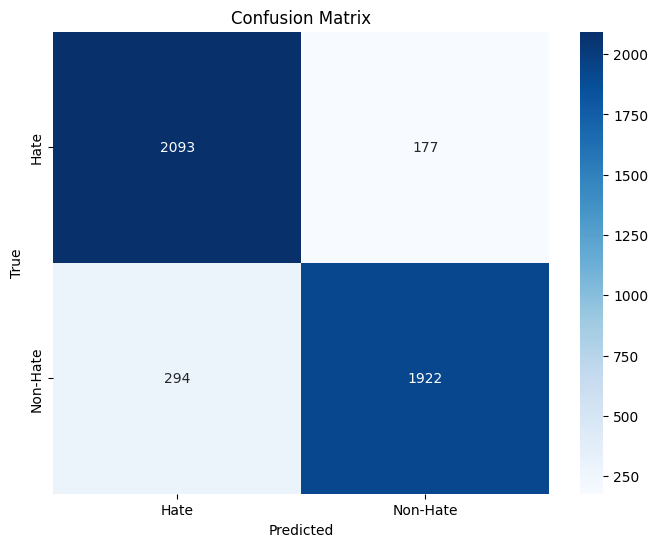

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import load

# Load your dataset
data = pd.read_csv('svm_stage1_dataset.csv')

# Split the dataset into features (X) and labels (y)
X = data['Content']
y_hate_non_hate = data[['Hate', 'Non-Hate']]

# Create TF-IDF vectorizer with the maximum number of features
max_features = 25718  # Use the correct maximum number of features
tfidf_vectorizer = TfidfVectorizer(max_features=max_features)

# Vectorize the text data
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_hate_non_hate, test_size=0.2, random_state=42)

# Load the pre-trained SVM model (assuming it's already trained and saved)
svm_hate_non_hate = load('svm_hate_non_hate_model.joblib')

# Make predictions on the test data
y_pred = svm_hate_non_hate.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Hate', 'Non-Hate'], yticklabels=['Hate', 'Non-Hate'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import load

# Text to test (replace with your hate speech sentence)
hate_speech_sentence = "such senseless act could only make sense to fools like this fulani_govt thinking killing would even toughen ipobs esn biafranation agitation and would degenerate to a s"

#hate_speech_sentence = "To hell with Igbo Religions and Culture"

# Load the pre-trained TF-IDF vectorizer and SVM model
tfidf_vectorizer = load('tfidf_vectorizer.joblib')  # Load the pre-trained vectorizer
svm_hate_non_hate = load('svm_hate_non_hate_model.joblib')

# Vectorize the test sentence
test_sentence_tfidf = tfidf_vectorizer.transform([hate_speech_sentence])

# Make a prediction
prediction = svm_hate_non_hate.predict(test_sentence_tfidf)

# Print the prediction (1 for Hate, 0 for Non-Hate)
if prediction[0][0] == 1:
    print("The sentence is classified as Hate speech.")
else:
    print("The sentence is classified as Non-Hate speech.")


The sentence is classified as Hate speech.


In [ ]:
import pandas as pd
# Load your dataset
data = pd.read_csv('dataset_without_non_hate_svm_2.csv')
print(data.columns)


Index(['Content', 'Religious', 'Ethnicity', 'Other', 'Religion_Ethnicity'], dtype='object')


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import dump

# Load your dataset
data = pd.read_csv('dataset_without_non_hate_svm_2.csv')

# Extract the text data
X = data['Content']

# Create TF-IDF vectorizer without limiting features initially
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data to get the TF-IDF matrix
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Save the TF-IDF vectorizer to a joblib file
dump(tfidf_vectorizer, 'second_svm_other_religious_ethnicity_tfidf_vectorizer.joblib')

# Get the maximum number of features
max_features = X_tfidf.shape

print(f"Maximum number of features in the TF-IDF matrix: {max_features}")


Maximum number of features in the TF-IDF matrix: (1994, 5586)


Second SVm

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import dump

# Load your dataset
data = pd.read_csv('dataset_without_non_hate_svm_2.csv')

# Extract the text data
X = data['Content']

# Create TF-IDF vectorizer with the maximum number of features
max_features = 5586  # Use the correct maximum number of features
tfidf_vectorizer = TfidfVectorizer(max_features=max_features)

# Vectorize the text data
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Save the TF-IDF vectorizer to a file
dump(tfidf_vectorizer, 'tfidf_vectorizer_svm2.joblib')

# Save the TF-IDF vectors to a file
dump(X_tfidf, 'tfidf_vectors_svm2.joblib')


['tfidf_vectors_svm2.joblib']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump

# Load your dataset for the new task
data = pd.read_csv('svm_stage2_dataset.csv')

# Split the dataset into features (X) and labels (y)
X = data['Content']
y_other_religion_ethnicity = data[['Other', 'Religion_Ethnicity']]

# Create TF-IDF vectorizer with the maximum number of features
max_features = 5586   # Use the correct maximum number of features
tfidf_vectorizer = TfidfVectorizer(max_features=max_features)

# Vectorize the text data
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_other_religion_ethnicity, test_size=0.2, random_state=42)

# First SVM: Other vs Religion_Ethnicity
print("Training the SVM: Other vs Religion_Ethnicity")
svm_other_religion_ethnicity = MultiOutputClassifier(SVC(kernel='linear'))
svm_other_religion_ethnicity.fit(X_train, y_train)
print("SVM training complete.")

# Save the SVM model
dump(svm_other_religion_ethnicity, 'svm_other_religion_ethnicity_model.joblib')

# Evaluation
y_pred = svm_other_religion_ethnicity.predict(X_test)

# Compute evaluation metrics for each output separately
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

output_labels = ['Other', 'Religion_Ethnicity']  # Labels for each output

for i in range(y_test.shape[1]):
    accuracy_scores.append(accuracy_score(y_test.iloc[:, i], y_pred[:, i]))
    precision_scores.append(precision_score(y_test.iloc[:, i], y_pred[:, i], average='weighted'))
    recall_scores.append(recall_score(y_test.iloc[:, i], y_pred[:, i], average='weighted'))
    f1_scores.append(f1_score(y_test.iloc[:, i], y_pred[:, i], average='weighted'))

# Print the evaluation metrics for each output
for i in range(y_test.shape[1]):
    print(f"{output_labels[i]}:")
    print(f"Accuracy: {accuracy_scores[i]:.2f}")
    print(f"Precision: {precision_scores[i]:.2f}")
    print(f"Recall: {recall_scores[i]:.2f}")
    print(f"F1-Score: {f1_scores[i]:.2f}")
    print()


Training the SVM: Other vs Religion_Ethnicity
SVM training complete.
Other:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-Score: 0.96

Religion_Ethnicity:
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-Score: 0.97



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix for Other:
[[ 122   69]
 [   5 2042]]


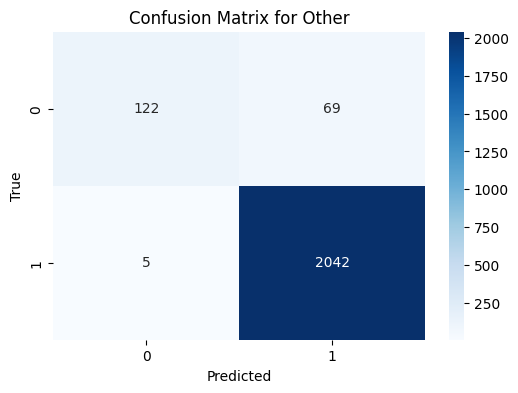

Confusion Matrix for Religion_Ethnicity:
[[2024    3    0]
 [  63  147    0]
 [   1    0    0]]


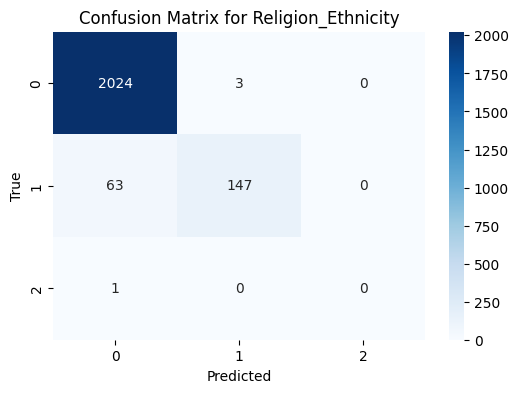

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create confusion matrices for each output
confusion_matrices = []

for i in range(y_test.shape[1]):
    cm = confusion_matrix(y_test.iloc[:, i], y_pred[:, i])
    confusion_matrices.append(cm)

# Plot and display the confusion matrices
for i, cm in enumerate(confusion_matrices):
    # Display numerical matrix
    print(f'Confusion Matrix for {output_labels[i]}:')
    print(cm)

    # Plot confusion matrix as an image
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {output_labels[i]}')
    plt.show()


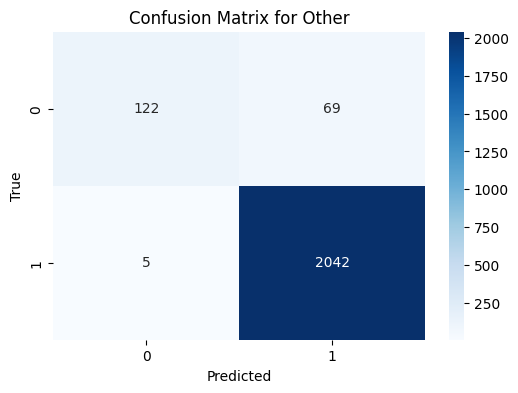

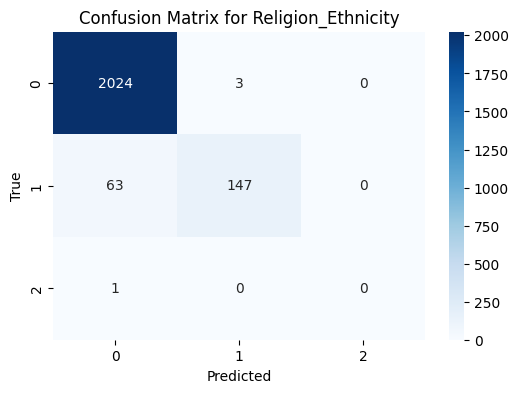

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create confusion matrices for each output
confusion_matrices = []

for i in range(y_test.shape[1]):
    cm = confusion_matrix(y_test.iloc[:, i], y_pred[:, i])
    confusion_matrices.append(cm)

# Plot the confusion matrices
for i, cm in enumerate(confusion_matrices):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {output_labels[i]}')
    plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import load

# Text to test
test_sentence = "igbo people are the most tribalistic and corrupt individuals in this nigeria theyre on the path to becoming genocidal as well ps i have igbo blood so i am not being bias esn ipob"

#test_sentence = "such senseless act could only make sense to fools like this fulani_govt thinking killing would even toughen ipobs esn biafranation agitation and would degenerate to a s"

#test_sentence ="ipob remains the only constant obstacle on the path of the fulani conquest of the rest of nigeria now the duty of safeguarding biafraland remains our sole focus responsibility this is why esn was created to put an end to the unchecked atrocities against innocent biafrans"

# Load the pre-trained TF-IDF vectorizer and SVM model
tfidf_vectorizer = load('tfidf_vectorizer_svm2.joblib')  # Load the pre-trained vectorizer
svm_other_religion_ethnicity = load('svm_other_religion_ethnicity_model.joblib')

# Vectorize the test sentence
test_sentence_tfidf = tfidf_vectorizer.transform([test_sentence])

# Make a prediction
prediction = svm_other_religion_ethnicity.predict(test_sentence_tfidf)

# Print the prediction (1 for 'Other', 0 for 'Religion_Ethnicity')
if prediction[0][0] == 1:
    print("The sentence is classified as 'Other'.")
else:
    print("The sentence is classified as 'Religion_Ethnicity'.")


The sentence is classified as 'Other'.


In [ ]:
# Read the dataset
df = pd.read_csv('dataset_without_others_and_non_hate_svm_3.csv')

# Count the number of rows in the dataset
num_rows = len(df)
print(f"Number of rows in the dataset: {num_rows}")

# Display the first five rows of the dataset
print("First five rows of the dataset:")
print(df.head())


Number of rows in the dataset: 531
First five rows of the dataset:
                                             Content  Religious  Ethnicity
0   madness of the highest order if gumi or whate...          1          0
1  delete threats esn we curse workers of iniquit...          1          0
2  coranavirus not a single pastor in africa prop...          1          0
3   i dunno when youll have common sense enough t...          1          0
4  to all my friends and families and enemies who...          1          0


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import dump

# Load your dataset
data = pd.read_csv('dataset_without_others_and_non_hate_svm_3.csv')

# Extract the text data
X = data['Content']

# Create TF-IDF vectorizer without limiting features initially
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data to get the TF-IDF matrix
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Save the TF-IDF vectorizer to a joblib file
dump(tfidf_vectorizer, 'third_svm_religious_ethnicity_tfidf_vectorizer.joblib')

# Get the maximum number of features
max_features = X_tfidf.shape

print(f"Maximum number of features in the TF-IDF matrix: {max_features}")


Maximum number of features in the TF-IDF matrix: (531, 2049)


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import dump

# Load your dataset
data = pd.read_csv('dataset_without_others_and_non_hate_svm_3.csv')

# Extract the text data
X = data['Content']

# Create TF-IDF vectorizer with the maximum number of features
max_features = 2043  # Use the correct maximum number of features
tfidf_vectorizer = TfidfVectorizer(max_features=max_features)

# Vectorize the text data
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Save the TF-IDF vectorizer to a file
dump(tfidf_vectorizer, 'tfidf_vectorizer_svm3.joblib')

# Save the TF-IDF vectors to a file
dump(X_tfidf, 'tfidf_vectors_svm3.joblib')


['tfidf_vectors_svm3.joblib']

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import dump

# Load your dataset
data = pd.read_csv('dataset_without_others_and_non_hate_svm_3.csv')

# Extract the text data
X = data['Content']

# Create TF-IDF vectorizer without limiting features initially
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the text data to get the TF-IDF matrix
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Save the TF-IDF vectorizer to a joblib file
dump(tfidf_vectorizer, 'third_svm_religious_ethnicity_tfidf_vectorizer.joblib')

# Get the maximum number of features
max_features = X_tfidf.shape[1]  # Use shape[1] to get the number of features

print(f"Maximum number of features in the TF-IDF matrix: {max_features}")


Maximum number of features in the TF-IDF matrix: 2049


In [ ]:
import pandas as pd
# Load your dataset
data = pd.read_csv('dataset_without_others_and_non_hate_svm_3.csv')
print(data.columns)


Index(['Content', 'Religious', 'Ethnicity'], dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump

# Load your dataset for the new task
data = pd.read_csv('dataset_without_others_and_non_hate_svm_3.csv')

# Split the dataset into features (X) and labels (y)
X = data['Content']
y_other_religion_ethnicity = data[['Religious', 'Ethnicity']]

# Create TF-IDF vectorizer with the maximum number of features
max_features = 2043   # Use the correct maximum number of features
tfidf_vectorizer = TfidfVectorizer(max_features=max_features)

# Vectorize the text data
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_other_religion_ethnicity, test_size=0.2, random_state=42)

# First SVM: Religious vs Ethnicity
print("Training the SVM: Religious vs Ethnicity")
svm_other_religion_ethnicity = MultiOutputClassifier(SVC(kernel='linear'))
svm_other_religion_ethnicity.fit(X_train, y_train)
print("SVM training complete.")

# Save the SVM model
dump(svm_other_religion_ethnicity, 'svm_religion_ethnicity_model.joblib')

# Evaluation
y_pred = svm_other_religion_ethnicity.predict(X_test)

# Compute evaluation metrics for each output separately
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

output_labels = ['Religious', 'Ethnicity']  # Labels for each output

for i in range(y_test.shape[1]):
    accuracy_scores.append(accuracy_score(y_test.iloc[:, i], y_pred[:, i]))
    precision_scores.append(precision_score(y_test.iloc[:, i], y_pred[:, i], average='weighted'))
    recall_scores.append(recall_score(y_test.iloc[:, i], y_pred[:, i], average='weighted'))
    f1_scores.append(f1_score(y_test.iloc[:, i], y_pred[:, i], average='weighted'))

# Print the evaluation metrics for each output
for i in range(y_test.shape[1]):
    print(f"{output_labels[i]}:")
    print(f"Accuracy: {accuracy_scores[i]:.2f}")
    print(f"Precision: {precision_scores[i]:.2f}")
    print(f"Recall: {recall_scores[i]:.2f}")
    print(f"F1-Score: {f1_scores[i]:.2f}")
    print()


Training the SVM: Religious vs Ethnicity
SVM training complete.
Religious:
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1-Score: 0.93

Ethnicity:
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1-Score: 0.93



Confusion Matrix for Religious:
[[43  5]
 [ 3 56]]


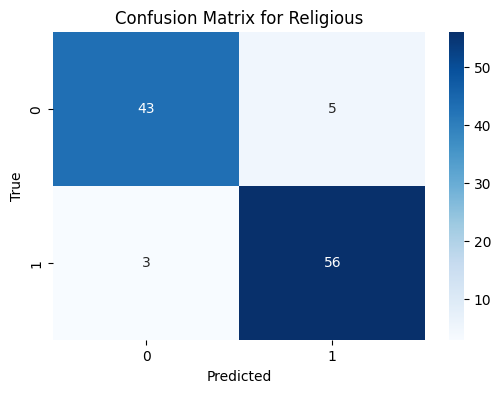

Confusion Matrix for Ethnicity:
[[56  3]
 [ 5 43]]


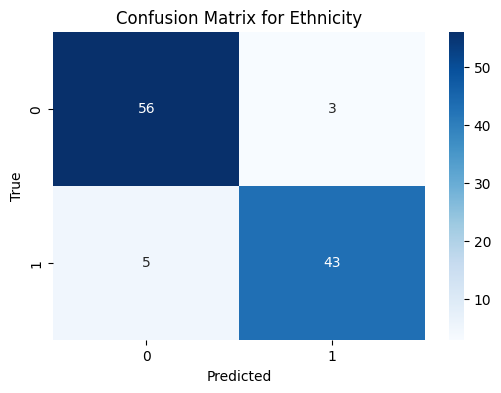

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute multilabel confusion matrix
mcm = multilabel_confusion_matrix(y_test, y_pred)

# Plot and display the confusion matrices
for i, cm in enumerate(mcm):
    # Display numerical matrix
    print(f'Confusion Matrix for {output_labels[i]}:')
    print(cm)

    # Plot confusion matrix as an image
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {output_labels[i]}')
    plt.show()

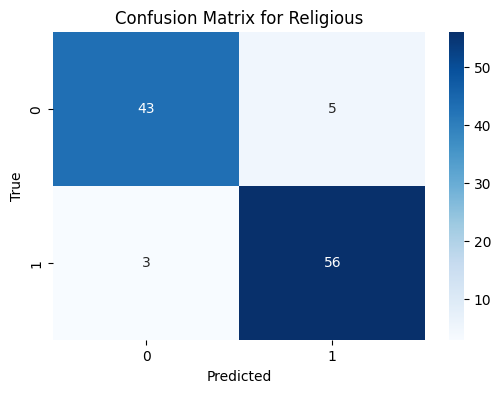

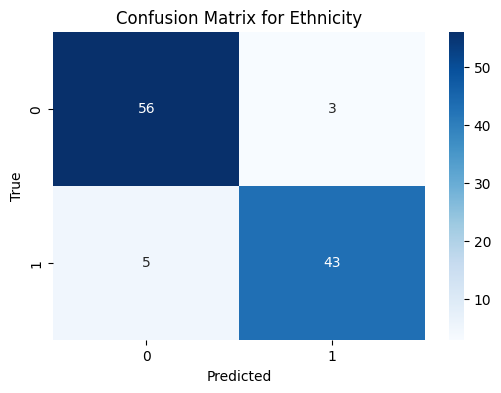

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute multilabel confusion matrix
mcm = multilabel_confusion_matrix(y_test, y_pred)

# Plot the confusion matrices
for i, cm in enumerate(mcm):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {output_labels[i]}')
    plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import load

# Text to test
#test_sentence = "I hate Christians"

#test_sentence = "this is the way forward for sw and oduduwa congress no bastard i repeat no bastard from the north can deal we from the west our hospitality should not be taken as sign of cowardness sundayigboho we stand with âœšðÿ_x008f_âœšðÿ_x008f_âœšðÿ_x008f_âœšðÿ_x008f_ fulani must go"

#test_sentence = "coranavirus not a single pastor in africa prophet has volunteered to go to china to help yeye they smell sagamuonfire tinubu ooin"

test_sentence ="nnamdikanu and sundayigboho are terrorist while bandit fulani herdmen and bokoharam are saint nigeria my country"


# Load the pre-trained TF-IDF vectorizer and SVM model
tfidf_vectorizer = load('tfidf_vectorizer_svm3.joblib')  # Load the pre-trained vectorizer
svm_other_religion_ethnicity = load('svm_religion_ethnicity_model.joblib')

# Vectorize the test sentence
test_sentence_tfidf = tfidf_vectorizer.transform([test_sentence])

# Make a prediction
prediction = svm_other_religion_ethnicity.predict(test_sentence_tfidf)

# Print the prediction (1 for 'Other', 0 for 'Religion_Ethnicity')
if prediction[0][0] == 1:
    print("The sentence is classified as 'Religion'.")
else:
    print("The sentence is classified as 'Ethnicity'.")


The sentence is classified as 'Ethnicity'.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import load

# Load the pre-trained TF-IDF vectorizers and SVM models
tfidf_vectorizer1 = load('tfidf_vectorizer.joblib')  # Load the first vectorizer
svm_hate_non_hate = load('svm_hate_non_hate_model.joblib')  # First SVM
tfidf_vectorizer2 = load('tfidf_vectorizer_svm2.joblib')  # Load the second vectorizer
svm_other_religion_ethnicity = load('svm_other_religion_ethnicity_model.joblib')  # Second SVM
tfidf_vectorizer3 = load('tfidf_vectorizer_svm3.joblib')  # Load the third vectorizer
svm_religion_ethnicity = load('svm_religion_ethnicity_model.joblib')  # Third SVM

# Define the input sentence
#input_sentence = "such senseless act could only make sense to fools like this fulani_govt thinking killing would even toughen ipobs esn biafranation agitation and would degenerate to a s"
# Expected Result: Hate Other

#input_sentence = "the federal govt think that mass murder of ipob is the way to handle the deteriorating security situation in the southeast this is totally preposterous govt actually wants this country to implode they gave no pretences over their intentions "
# Expected Result: Hate Religion'

input_sentence= "yall dont want to see change when you are ready you will start by stoning those your sheikhs and imams they are using to enslave your brains then you will not sorosoke ðÿ"
# Expected Result: Hate Ethnicity

# Vectorize the input sentence using the first vectorizer
input_sentence_tfidf1 = tfidf_vectorizer1.transform([input_sentence])

# Make a prediction with the first SVM
prediction1 = svm_hate_non_hate.predict(input_sentence_tfidf1)

# Check if the first SVM predicts "Hate"
if prediction1[0][0] == 1:
    # If "Hate" is predicted, proceed with the second classification
    # Vectorize the input sentence using the second vectorizer
    input_sentence_tfidf2 = tfidf_vectorizer2.transform([input_sentence])

    # Make a prediction with the second SVM
    prediction2 = svm_other_religion_ethnicity.predict(input_sentence_tfidf2)

    # Check if the second SVM predicts "Other" or "Religion_Ethnicity"
    if prediction2[0][0] == 1:
        # If "Other" is predicted, you can perform further actions or classifications here
        print("The sentence is classified as 'Hate Other'.")
    else:
        # If "Religion_Ethnicity" is predicted, proceed with the third classification
        # Vectorize the input sentence using the third vectorizer
        input_sentence_tfidf3 = tfidf_vectorizer3.transform([input_sentence])

        # Make a prediction with the third SVM
        prediction3 = svm_religion_ethnicity.predict(input_sentence_tfidf3)

        # Check if the third SVM predicts "Religion" or "Ethnicity"
        if prediction3[0][0] == 1:
            print("The sentence is classified as 'Hate Religion'.")
        else:
            print("The sentence is classified as 'Hate Ethnicity'.")
else:
    # If "Non-Hate" is predicted by the first SVM, you can handle it accordingly
    print("The sentence is classified as Non-Hate speech.")


The sentence is classified as 'Hate Other'.


In [ ]:
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.6 MB/s eta 0:00:00


In [ ]:
from ipywidgets import widgets
from IPython.display import display, HTML
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import load

# Load the pre-trained TF-IDF vectorizers and SVM models
tfidf_vectorizer1 = load('tfidf_vectorizer.joblib')  # Load the first vectorizer
svm_hate_non_hate = load('svm_hate_non_hate_model.joblib')  # First SVM
tfidf_vectorizer2 = load('tfidf_vectorizer_svm2.joblib')  # Load the second vectorizer
svm_other_religion_ethnicity = load('svm_other_religion_ethnicity_model.joblib')  # Second SVM
tfidf_vectorizer3 = load('tfidf_vectorizer_svm3.joblib')  # Load the third vectorizer
svm_religion_ethnicity = load('svm_religion_ethnicity_model.joblib')  # Third SVM


# Create a text input widget
text_input = widgets.Textarea(
    placeholder='Enter text for classification...',
    layout=widgets.Layout(width='400px', height='200px')
)

# Create a button widget
classify_button = widgets.Button(description='Classify')

# Create a text widget to display the result
result_text = widgets.HTML()

# Function to classify the input sentence
def classify_sentence(_):
    input_sentence = text_input.value.strip()

    if input_sentence:
        # Vectorize the input sentence using the first vectorizer
        input_sentence_tfidf1 = tfidf_vectorizer1.transform([input_sentence])

        # Make a prediction with the first SVM
        prediction1 = svm_hate_non_hate.predict(input_sentence_tfidf1)

        # Check if the first SVM predicts "Hate"
        if prediction1[0][0] == 1:
            # If "Hate" is predicted, proceed with the second classification
            # Vectorize the input sentence using the second vectorizer
            input_sentence_tfidf2 = tfidf_vectorizer2.transform([input_sentence])

            # Make a prediction with the second SVM
            prediction2 = svm_other_religion_ethnicity.predict(input_sentence_tfidf2)

            # Check if the second SVM predicts "Other" or "Religion_Ethnicity"
            if prediction2[0][0] == 1:
                result_text.value = "The sentence is classified as 'Hate Other'."
            else:
                # If "Religion_Ethnicity" is predicted, proceed with the third classification
                # Vectorize the input sentence using the third vectorizer
                input_sentence_tfidf3 = tfidf_vectorizer3.transform([input_sentence])

                # Make a prediction with the third SVM
                prediction3 = svm_religion_ethnicity.predict(input_sentence_tfidf3)

                # Check if the third SVM predicts "Religion" or "Ethnicity"
                if prediction3[0][0] == 1:
                    result_text.value = "The sentence is classified as 'Hate Religion'."
                else:
                    result_text.value = "The sentence is classified as 'Hate Ethnicity'."
        else:
            # If "Non-Hate" is predicted by the first SVM, you can handle it accordingly
            result_text.value = "The sentence is classified as Non-Hate speech."
    else:
        result_text.value = "Please enter a sentence for classification."

# Define the classify_button click event
classify_button.on_click(classify_sentence)

# Display the widgets
display(text_input, classify_button, result_text)


Textarea(value='', layout=Layout(height='200px', width='400px'), placeholder='Enter text for classification...…

Button(description='Classify', style=ButtonStyle())

HTML(value='')

In [ ]:
import joblib
import ipywidgets as widgets
from IPython.display import display, HTML, Image

# Load the trained models
svm_hate_non_hate = joblib.load('svm_hate_non_hate_model.joblib')
svm_other_religion_ethnicity = joblib.load('svm_other_religion_ethnicity_model.joblib')
svm_religion_ethnicity = joblib.load('svm_religion_ethnicity_model.joblib')

# Load the TF-IDF vectorizers
tfidf_vectorizer_hate_non_hate = joblib.load('tfidf_vectorizer.joblib')
tfidf_vectorizer_other_religion_ethnicity = joblib.load('tfidf_vectorizer_svm2.joblib')
tfidf_vectorizer_religion_ethnicity = joblib.load('tfidf_vectorizer_svm3.joblib')


from ipywidgets import widgets, HTML
from IPython.display import display

# Create an HTML widget for adding an image
image_html = HTML(
    value='<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/0*O_hRMkov1Gcy4msS.png" alt="Placeholder Image" width="300px">',
    layout=widgets.Layout(margin='10px 0')
)

# Create a button widget with styling
classify_button = widgets.Button(
    description='Classify',
    style={'font-size': '16px', 'background-color': 'blue', 'color': 'white'},
    layout=widgets.Layout(margin='10px 0')
)

# Create a text widget for displaying the result
result_text = widgets.HTML(
    value='',
    layout=widgets.Layout(margin='10px 0')
)

# Function to classify the input sentence and update the image and text
def classify_sentence(_):
    input_sentence = text_input.value.strip()

    if input_sentence:
        # Vectorize the input sentence using the first vectorizer
        input_sentence_tfidf1 = tfidf_vectorizer1.transform([input_sentence])

        # Make a prediction with the first SVM
        prediction1 = svm_hate_non_hate.predict(input_sentence_tfidf1)

        # Check if the first SVM predicts "Hate"
        if prediction1[0][0] == 1:
            # If "Hate" is predicted, proceed with the second classification
            # Vectorize the input sentence using the second vectorizer
            input_sentence_tfidf2 = tfidf_vectorizer2.transform([input_sentence])

            # Make a prediction with the second SVM
            prediction2 = svm_other_religion_ethnicity.predict(input_sentence_tfidf2)

            # Check if the second SVM predicts "Other" or "Religion_Ethnicity"
            if prediction2[0][0] == 1:
                result_text.value = "The sentence is classified as 'Hate Other'."
            else:
                # If "Religion_Ethnicity" is predicted, proceed with the third classification
                # Vectorize the input sentence using the third vectorizer
                input_sentence_tfidf3 = tfidf_vectorizer3.transform([input_sentence])

                # Make a prediction with the third SVM
                prediction3 = svm_religion_ethnicity.predict(input_sentence_tfidf3)

                # Check if the third SVM predicts "Religion" or "Ethnicity"
                if prediction3[0][0] == 1:
                    result_text.value = "The sentence is classified as 'Hate Religion'."
                else:
                    result_text.value = "The sentence is classified as 'Hate Ethnicity'."
        else:
            # If "Non-Hate" is predicted by the first SVM, you can handle it accordingly
            result_text.value = "The sentence is classified as Non-Hate speech."
    else:
        result_text.value = "Please enter a sentence for classification."

# Define the text input widget
text_input = widgets.Textarea(
    placeholder='Enter text for classification...',
    layout=widgets.Layout(width='400px', height='200px')
)

# Define the classify_button click event
classify_button.on_click(classify_sentence)

# Display the widgets
display(image_html, text_input, classify_button, result_text)


HTML(value='<img src="https://miro.medium.com/v2/resize:fit:720/format:webp/0*O_hRMkov1Gcy4msS.png" alt="Place…

Textarea(value='', layout=Layout(height='200px', width='400px'), placeholder='Enter text for classification...…

Button(description='Classify', layout=Layout(margin='10px 0'), style=ButtonStyle())

HTML(value='', layout=Layout(margin='10px 0'))

In [ ]:
from ipywidgets import widgets
from IPython.display import display, HTML
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import load

# Load the pre-trained TF-IDF vectorizers and SVM models
tfidf_vectorizer1 = load('tfidf_vectorizer.joblib')  # Load the first vectorizer
svm_hate_non_hate = load('svm_hate_non_hate_model.joblib')  # First SVM
tfidf_vectorizer2 = load('tfidf_vectorizer_svm2.joblib')  # Load the second vectorizer
svm_other_religion_ethnicity = load('svm_other_religion_ethnicity_model.joblib')  # Second SVM
tfidf_vectorizer3 = load('tfidf_vectorizer_svm3.joblib')  # Load the third vectorizer
svm_religion_ethnicity = load('svm_religion_ethnicity_model.joblib')  # Third SVM



# Function to classify the input sentence
def classify_sentence():

    text = input("text")
    input_sentence = text.strip()
    value = ''

    if input_sentence:
        # Vectorize the input sentence using the first vectorizer
        input_sentence_tfidf1 = tfidf_vectorizer1.transform([input_sentence])

        # Make a prediction with the first SVM
        prediction1 = svm_hate_non_hate.predict(input_sentence_tfidf1)

        # Check if the first SVM predicts "Hate"
        if prediction1[0][0] == 1:
            # If "Hate" is predicted, proceed with the second classification
            # Vectorize the input sentence using the second vectorizer
            input_sentence_tfidf2 = tfidf_vectorizer2.transform([input_sentence])

            # Make a prediction with the second SVM
            prediction2 = svm_other_religion_ethnicity.predict(input_sentence_tfidf2)

            # Check if the second SVM predicts "Other" or "Religion_Ethnicity"
            if prediction2[0][0] == 1:
                value = "The sentence is classified as 'Hate Other'."
            else:
                # If "Religion_Ethnicity" is predicted, proceed with the third classification
                # Vectorize the input sentence using the third vectorizer
                input_sentence_tfidf3 = tfidf_vectorizer3.transform([input_sentence])

                # Make a prediction with the third SVM
                prediction3 = svm_religion_ethnicity.predict(input_sentence_tfidf3)

                # Check if the third SVM predicts "Religion" or "Ethnicity"
                if prediction3[0][0] == 1:
                    value = "The sentence is classified as 'Hate Religion'."
                else:
                    value = "The sentence is classified as 'Hate Ethnicity'."
        else:
            # If "Non-Hate" is predicted by the first SVM, you can handle it accordingly
            value = "The sentence is classified as Non-Hate speech."
    else:
        value = "Please enter a sentence for classification."

    return valuem



In [ ]:
classify_sentence()

5/11/2023

The code has been updated to splits the input sentence into smaller sentences using punctuation as the delimiter and then classifies each smaller sentence separately. It prints the classification for each smaller sentence.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import load

# Load the pre-trained TF-IDF vectorizers and SVM models
tfidf_vectorizer1 = load('tfidf_vectorizer.joblib')  # Load the first vectorizer
svm_hate_non_hate = load('svm_hate_non_hate_model.joblib')  # First SVM
tfidf_vectorizer2 = load('tfidf_vectorizer_svm2.joblib')  # Load the second vectorizer
svm_other_religion_ethnicity = load('svm_other_religion_ethnicity_model.joblib')  # Second SVM
tfidf_vectorizer3 = load('tfidf_vectorizer_svm3.joblib')  # Load the third vectorizer
svm_religion_ethnicity = load('svm_religion_ethnicity_model.joblib')  # Third SVM

# Define the input sentence
input_sentence = "such senseless act could only make sense to fools like this fulani_govt thinking killing would even toughen ipobs esn biafranation agitation and would degenerate to a s.  the federal govt think that mass murder of ipob is the way to handle the deteriorating security situation in the southeast this is totally preposterous govt actually wants this country to implode they gave no pretences over their intentions. yall dont want to see change when you are ready you will start by stoning those your sheikhs and imams they are using to enslave your brains then you will not sorosoke ðÿ"
# Split the input sentence into smaller sentences using punctuation as the delimiter
sentences = [sentence.strip() for sentence in input_sentence.split('.')]

# Iterate through the smaller sentences
for sentence in sentences:
    # Vectorize the sentence using the first vectorizer
    sentence_tfidf1 = tfidf_vectorizer1.transform([sentence])

    # Make a prediction with the first SVM
    prediction1 = svm_hate_non_hate.predict(sentence_tfidf1)

    # Check if the first SVM predicts "Hate"
    if prediction1[0][0] == 1:
        # If "Hate" is predicted, proceed with the second classification
        # Vectorize the sentence using the second vectorizer
        sentence_tfidf2 = tfidf_vectorizer2.transform([sentence])

        # Make a prediction with the second SVM
        prediction2 = svm_other_religion_ethnicity.predict(sentence_tfidf2)

        # Check if the second SVM predicts "Other" or "Religion_Ethnicity"
        if prediction2[0][0] == 1:
            # If "Other" is predicted, you can perform further actions or classifications here
            print(f"The sentence '{sentence}' is classified as 'Hate Other'.")
        else:
            # If "Religion_Ethnicity" is predicted, proceed with the third classification
            # Vectorize the sentence using the third vectorizer
            sentence_tfidf3 = tfidf_vectorizer3.transform([sentence])

            # Make a prediction with the third SVM
            prediction3 = svm_religion_ethnicity.predict(sentence_tfidf3)

            # Check if the third SVM predicts "Religion" or "Ethnicity"
            if prediction3[0][0] == 1:
                print(f"The sentence '{sentence}' is classified as 'Hate Religion'.")
            else:
                print(f"The sentence '{sentence}' is classified as 'Hate Ethnicity'.")
    else:
        # If "Non-Hate" is predicted by the first SVM, you can handle it accordingly
        print(f"The sentence '{sentence}' is classified as Non-Hate speech.")
